Neste terceiro relatório utilizaremos o modelo ARIMA discutido durante estas semanas para realizar a previsão da atividade econômica nos próximos trimestres. 

O modelo ARIMA deve ser especificado utilizando a metodologia Box-Jenkins para determinação de suas ordens e testado (estimar com dados até 4/2021 e verificar o quanto acertaram dos dados de 2022). Uma vez escolhida a melhor especificação realizar as projeções a partir de 4/2022. 

Estamos tratando de séries de tempo, atentem-se para os gráficos descritivos das variáveis e para discussão dos gráficos dos elementos auto regressivos para a determinação da ordem do ARIMA. 

Vocês podem escolher usar um modelo univariado (o PIB com ele mesmo), obrigatoriamente vocês precisam apresentar os testes de estacionariedade (onde irão descobrir a ordem de integração, o "I" do ARIMA e a análise gráfica dos correlogramas para descobrirem a ordem do AR e do MA).


Basicamente, quatro são os passos ao se trabalhar com o modelo ARIMA, identificação, estimação dos parâmetros e verificação dos resíduos, os quais devem estar isentos de autocorrelação (ruído branco). A partir da obtenção de resíduos ruído branco, parte-se para a previsão

Pacotes

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Importação e tratamento

In [2]:
pib = pd.read_excel('serie_historica_pib.xlsx')

pib.dropna(inplace=True)

pib['quarter'] = pd.date_range(start='1/1/1996', periods=len(pib), freq='Q')

pib.set_index('quarter', inplace=True)

pib.drop(['Trimestre'], axis=1, inplace=True)

In [8]:
pib.tail()

,PIB
quarter,
2021-12-31,2309564
2022-03-31,2315709
2022-06-30,2471837
2022-09-30,2543645
2022-12-31,2584126


Análise descritiva

In [23]:
pib.plot()
plt.show()

<ipython-input-23-138f03f3f49e>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


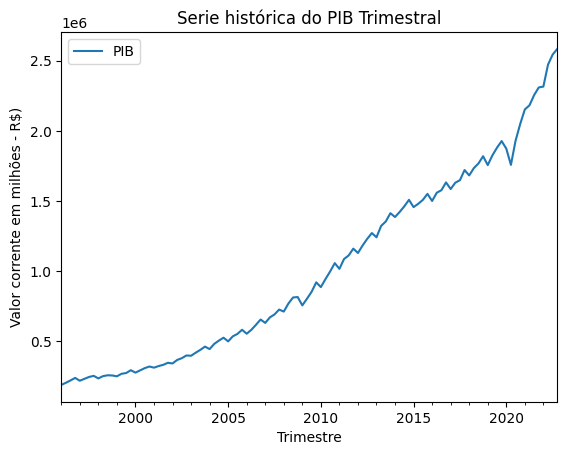

In [34]:
pib.plot()
plt.xlabel('Trimestre')
plt.ylabel('Valor corrente em milhões - R$)')
plt.title('Serie histórica do PIB Trimestral')
plt.show()

Serie não estacionária

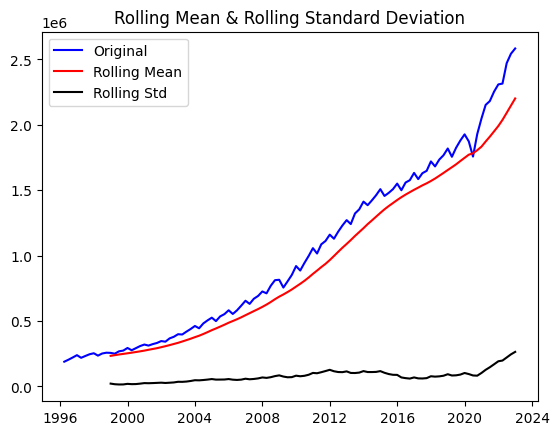

In [47]:
rolling_mean = pib.rolling(window = 12).mean()
rolling_std = pib.rolling(window = 12).std()

plt.plot(pib, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [50]:
result = adfuller(pib['PIB'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.4503301750347495
p-value: 0.9973312086831791
Critical Values:
	1%: -3.5011373281819504
	5%: -2.8924800524857854
	10%: -2.5832749307479226
